<a href="https://colab.research.google.com/github/jescalada/Tensorflow-colabs/blob/main/multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-class classification
Great for classifying multiple types of items within a certain group.

Some practice data: Fashion mnist dataset

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Data is already sorted into training and test sets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [4]:
# Show a sample
train_data[0], train_labels[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

In [5]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

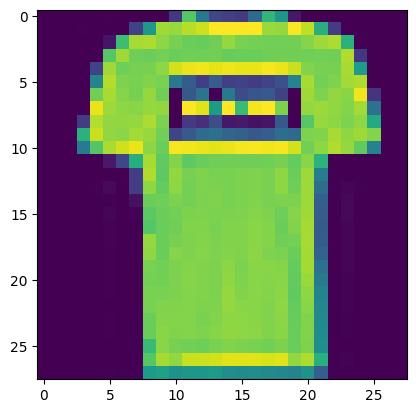

In [6]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[1])

In [7]:
# Convert labels into human-readable
class_names = ["Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Text(0.5, 1.0, 'Top')

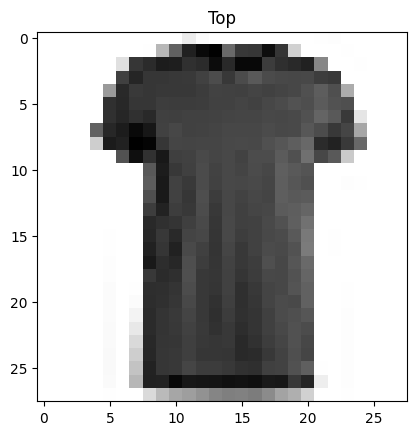

In [8]:
plt.imshow(train_data[17], cmap=plt.cm.binary)
plt.title(class_names[train_labels[17]])

# Building a multi-class classification model

The architecture will be similar to a binary classification model.
Just make sure you get the input and output shapes right.

In [9]:
# Set random seed
tf.random.set_seed(42)

# Create model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              # SparseCategoricalCrossentropy is for when data is not one-hot encoded
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

# Fit the model
history = model.fit(train_data,
                    train_labels,
                    epochs=50,
                    validation_data=(test_data, test_labels))

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1301 - accuracy: 0.2069 - val_loss: 1.8109 - val_accuracy: 0.2141
Epoch 2/50
1875/1875 [==============================] - 5s 2ms/step - loss: 1.7433 - accuracy: 0.2423 - val_loss: 1.7080 - val_accuracy: 0.2684
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7027 - accuracy: 0.2651 - val_loss: 1.6719 - val_accuracy: 0.2798
Epoch 4/50
 593/1875 [========>.....................] - ETA: 5s - loss: 1.6662 - accuracy: 0.2771

KeyboardInterrupt: ignored

In [10]:
# Normalize the data
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

In [11]:
# Generate a new model on normalized data
# Set seed
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              # SparseCategoricalCrossentropy is for when data is not one-hot encoded
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
              metrics=["accuracy"])

# Fit the model
history = model_2.fit(train_data_norm,
                    train_labels,
                    epochs=100,
                    validation_data=(test_data_norm, test_labels))

Epoch 1/100
1875/1875 [==============================] - 9s 4ms/step - loss: 1.3634 - accuracy: 0.4757 - val_loss: 0.8437 - val_accuracy: 0.6740
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7676 - accuracy: 0.7088 - val_loss: 0.7512 - val_accuracy: 0.7267
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6906 - accuracy: 0.7470 - val_loss: 0.6858 - val_accuracy: 0.7572
Epoch 4/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6404 - accuracy: 0.7699 - val_loss: 0.6471 - val_accuracy: 0.7702
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6096 - accuracy: 0.7832 - val_loss: 0.6226 - val_accuracy: 0.7790
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5875 - accuracy: 0.7927 - val_loss: 0.6151 - val_accuracy: 0.7873
Epoch 7/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5727 - accuracy: 0.7995 - val_loss: 0.6023 - val_ac

In [12]:
# Create confusion matrix
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix

figsize = (10, 10)

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)

  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to the class names
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted Label",
         ylabel="True Label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels)
  
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  threshold = (cm.max() + cm.min()) / 2

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[-1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [13]:
# Make a prediction with our model
y_probs = model_2.predict(test_data_norm)
y_preds = y_probs.argmax(axis=1)

y_probs[6], y_preds[:10], test_labels[:10]

313/313 [==============================] - 1s 1ms/step


(array([3.1704139e-03, 3.5852834e-05, 1.7228223e-01, 1.9392110e-03,
        5.7356083e-01, 2.7265654e-10, 1.7380303e-01, 1.8846294e-12,
        7.5208411e-02, 3.1475804e-09], dtype=float32),
 array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]),
 array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8))

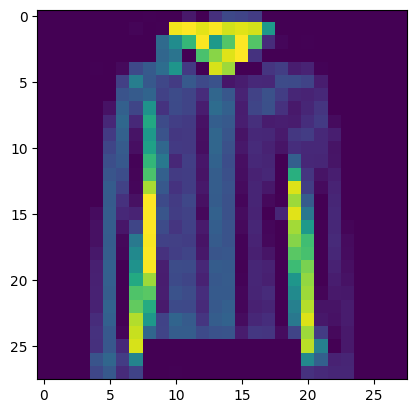

In [14]:
plt.imshow(test_data[6])

In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[744,   8,  13,  71,   2,   3, 143,   0,  16,   0],
       [  3, 943,  14,  35,   1,   0,   2,   0,   2,   0],
       [ 13,   4, 643,  14, 224,   0,  95,   0,   7,   0],
       [ 31,  11,   2, 859,  35,   2,  50,   0,  10,   0],
       [  1,   0,  68,  32, 830,   0,  54,   0,  15,   0],
       [  0,   0,   0,   1,   0, 899,   0,  54,   6,  40],
       [137,   1,  97,  53, 151,   1, 525,   0,  34,   1],
       [  0,   0,   0,   0,   0,  23,   0, 951,   2,  24],
       [  2,   1,   3,  12,   5,   2,  25,  10, 940,   0],
       [  1,   0,   0,   0,   0,  18,   0,  53,   2, 926]])

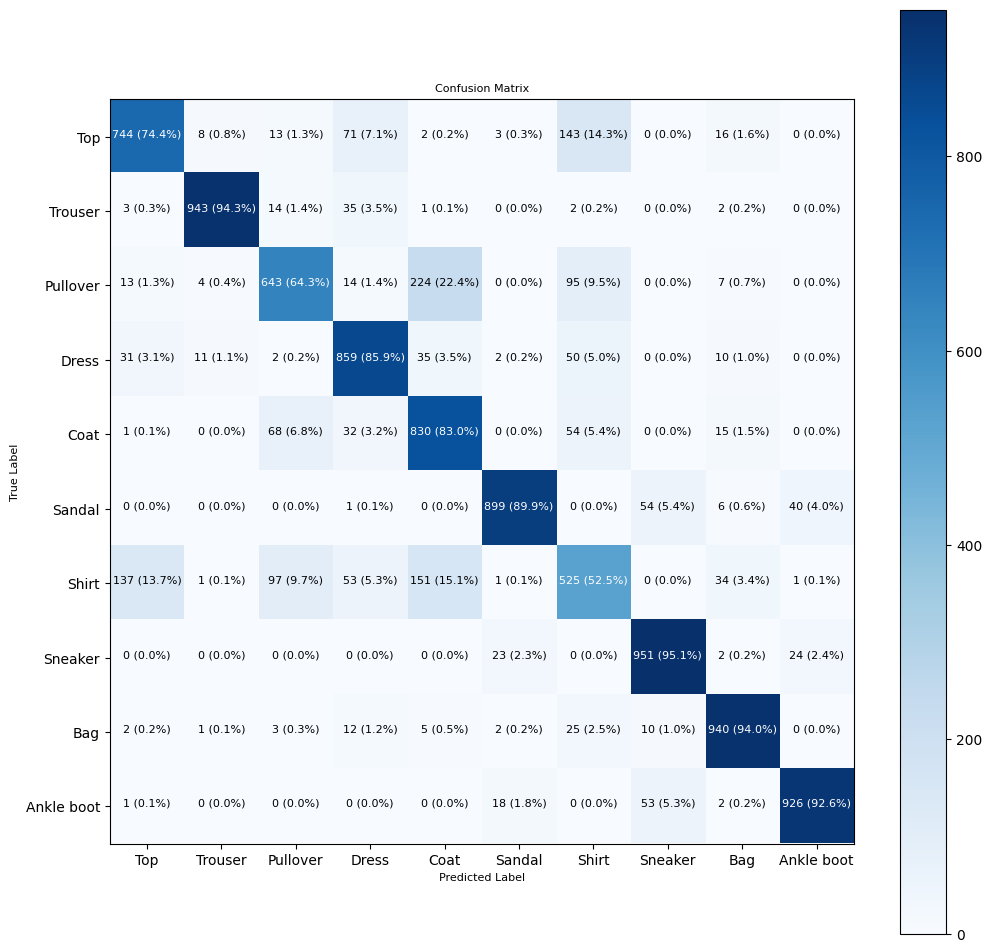

In [16]:
# Make a pretty confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(12, 12),
                      text_size=8)

# Visualizing random model
Helps develop a further understanding of the data and inputs/outputs of the models.

In [17]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it, and labels it with a prediction and truth label.
  """
  i = random.randint(0, len(images))

  target = images[i]

  pred_probs = model.predict(target.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target, cmap=plt.cm.binary)

  if pred_label == true_label:
    color = "green"
  else: color = "red"

  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                    100 * tf.reduce_max(pred_probs),
                                                    true_label),
             color=color)

1/1 [==============================] - 0s 22ms/step


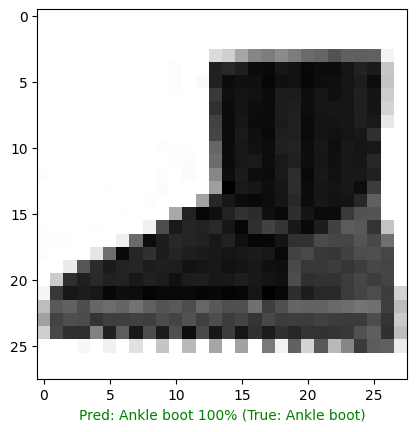

In [27]:
# Check out a random image along with its prediction
plot_random_image(model=model_2,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

# Check what the neural network is learning


In [ ]:
# Find the layers of the model
model_2.layers

Each of the neurons in the layer has a set of weights associated with the "branches" from the input neurons. Meanwhile, they also have a bias that affects all of the multiplications `Wi * Xi + b`. The biases are initialized at 0, meanwhile the weights get initialized randomly (uniform).

In [ ]:
weights, biases = model_2.layers[1].get_weights()
weights, weights.shape, biases, biases.shape

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_2, show_shapes=True)